Abyanandi Zaintama
H8 DSFT Batch 1


Phase 1 - Machine Learning
Milestone 1

Input variables:
bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

# Importing Module

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

# Data Loading and Preprocessing

In [108]:
df = pd.read_csv('/Users/zaintama/Documents/Hacktiv8/Dataset/bank-additional-full.csv',delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.shape

(41188, 21)

In [6]:
category = [var for var in df.columns if df[var].dtypes=='O']

print('There are {} categorical variables \n'.format(len(category)))
print('The categorical variables are: ', category)

There are 11 categorical variables 

The categorical variables are:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [7]:
df[category].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [8]:
for var in category:
    print(var,'contains', len(df[var].unique()),'labels ')

job contains 12 labels 
marital contains 4 labels 
education contains 8 labels 
default contains 3 labels 
housing contains 3 labels 
loan contains 3 labels 
contact contains 2 labels 
month contains 10 labels 
day_of_week contains 5 labels 
poutcome contains 3 labels 
y contains 2 labels 


# EDA

## Understanding the basics

In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


- Mean age is approximately 39 almost 40 years old. The minimum is 17 years old, and the maximum is 98 years old

As the data information said it will be better to drop the duration column since duration is highly correlated in whether a potential client will buy a term deposit. Also, duration is obtained after the call is made to the potential client so if the target client has never received calls this feature is not that useful. The reason why duration is highly correlated with opening a term deposit is because the more the bank talks to a target client the higher the probability the target client will open a term deposit since a higher duration means a higher interest (commitment) from the potential client.

>There are not that much insights we can gain from the descriptive dataset since most of our descriptive data is located not in the "numeric" columns but in the "categorical columns". 

## Checking categorical Column

### Job Column

In [10]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [11]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [12]:
df['job'].value_counts()/len(df)

admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: job, dtype: float64

In [13]:
import plotly.graph_objects as go
Job = round(df['job'].value_counts()/len(df['job'])*100,2)

labels = list(Job.index)
values = list(Job.values)

trace1 = go.Pie(labels=labels, values=values, marker=dict(colors=['red']))

layout = go.Layout(title = 'Distribution of Job', legend=dict(orientation='h'))

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [14]:
#dropping unknown values
df.drop(df.index[df['job'] == 'unknown'], inplace = True)
print(df['job'].unique())
print(df.shape)

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
(40858, 21)


### Marital Column

In [15]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [16]:
df['marital'].value_counts()

married     24694
single      11494
divorced     4599
unknown        71
Name: marital, dtype: int64

In [17]:
import plotly.graph_objects as go
Job = round(df['marital'].value_counts()/len(df['marital'])*100,2)

labels = list(Job.index)
values = list(Job.values)

trace1 = go.Pie(labels=labels, values=values, marker=dict(colors=['red']))

layout = go.Layout(title = 'Distribution of marital', legend=dict(orientation='h'))

fig2 = go.Figure(data=[trace1], layout=layout)
iplot(fig2)

### Education Column

In [18]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [19]:
df['education'].value_counts()

university.degree      12123
high.school             9478
basic.9y                6014
professional.course     5231
basic.4y                4124
basic.6y                2270
unknown                 1600
illiterate                18
Name: education, dtype: int64

In [20]:
import plotly.graph_objects as go
Job = round(df['education'].value_counts()/len(df['education'])*100,2)

labels = list(Job.index)
values = list(Job.values)

trace1 = go.Pie(labels=labels, values=values, marker=dict(colors=['red']))

layout = go.Layout(title = 'Distribution of education', legend=dict(orientation='h'))

fig3 = go.Figure(data=[trace1], layout=layout)
iplot(fig3)

In [21]:
#dropping unknown values
df.drop(df.index[df['education'] == 'unknown'], inplace = True)
print(df['education'].unique())
print(df.shape)

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']
(39258, 21)


### Default Column

default: has credit in default?

In [22]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [23]:
df['default'].value_counts()

no         31284
unknown     7971
yes            3
Name: default, dtype: int64

There isn't any unknown values in default column

### Housing Column

In [24]:
df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [25]:
df['housing'].value_counts()

yes        20605
no         17706
unknown      947
Name: housing, dtype: int64

There isn't any unknown values in housing column

### Loan Column

In [26]:
df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [27]:
df['housing'].value_counts()

yes        20605
no         17706
unknown      947
Name: housing, dtype: int64

### Contact Column

In [28]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [29]:
df['contact'].value_counts()

cellular     25030
telephone    14228
Name: contact, dtype: int64

In [30]:
df['contact'].value_counts()/len(df['contact'])

cellular     0.637577
telephone    0.362423
Name: contact, dtype: float64

Since the unknown value that are in contact are 28% of the data, we keep the values

### Month Column

month: last contact month of year

In [31]:
df['month'].value_counts()

may    13156
jul     6771
aug     5957
jun     5023
nov     3980
apr     2496
oct      681
sep      516
mar      511
dec      167
Name: month, dtype: int64

Most of customer was contacted on May, and least on December

### Poutcome Column

outcome of the previous marketing campaign

In [32]:
df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [33]:
df['poutcome'].value_counts()

nonexistent    33926
failure         4057
success         1275
Name: poutcome, dtype: int64

In [34]:
df['poutcome'].value_counts()/len(df['poutcome'])

nonexistent    0.864181
failure        0.103342
success        0.032477
Name: poutcome, dtype: float64

81% customer has unknown outcome of the previous campaign

## Distribution of numeric data

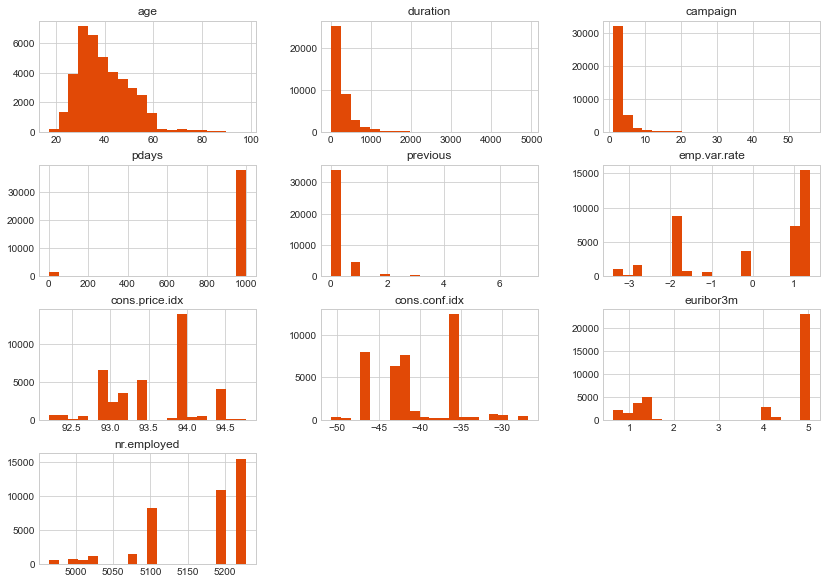

In [35]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

## Age Distribution

In [36]:
print('Min age: ', df['age'].max())
print('Max age: ', df['age'].min())
print('Null Values: ', df['age'].isnull().any())

Min age:  98
Max age:  17
Null Values:  False


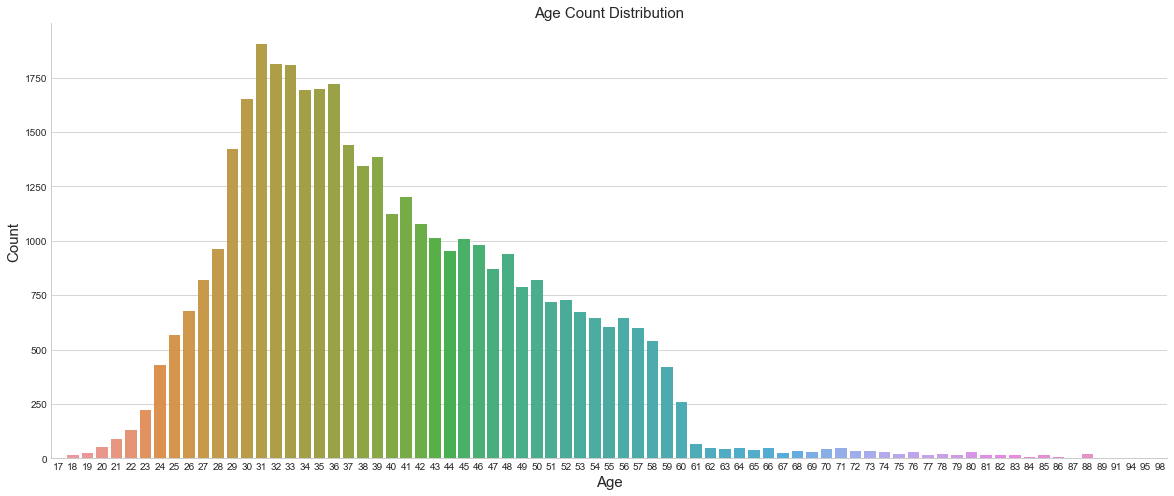

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

/Users/zaintama/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/zaintama/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



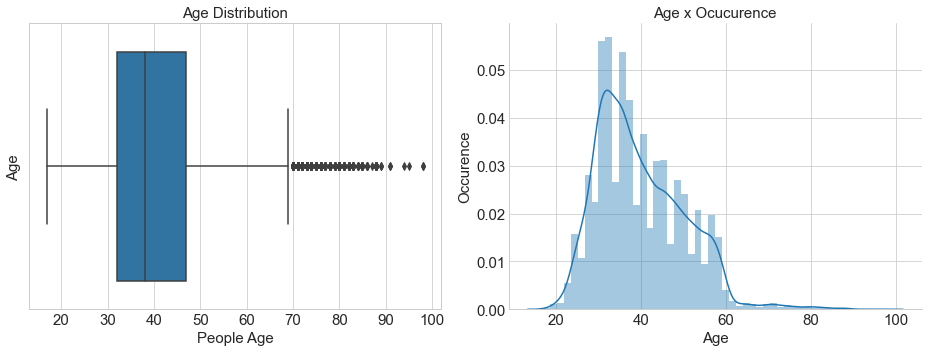

In [38]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [39]:
# Quartiles
print('1º Quartile: ', df['age'].quantile(q = 0.25))
print('2º Quartile: ', df['age'].quantile(q = 0.50))
print('3º Quartile: ', df['age'].quantile(q = 0.75))
print('4º Quartile: ', df['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', df['age'].quantile(q = 0.75) + 
                      1.5*(df['age'].quantile(q = 0.75) - df['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0
Ages above:  69.5 are outliers


In [40]:
print('Numerber of outliers: ', df[df['age'] > 69.6]['age'].count())
print('Number of clients: ', len(df))
#Outliers in %
print('Outliers are:', round(df[df['age'] > 69.6]['age'].count()*100/len(df),2), '%')

Numerber of outliers:  421
Number of clients:  39258
Outliers are: 1.07 %


In [41]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(df['age'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(df['age'].std(), 1))
# I thing the best way to give a precisly insight abou dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(df['age'].std()*100/df['age'].mean(), 1), ', High middle dispersion')

MEAN: 39.9
STD : 10.3
CV  : 25.8 , High middle dispersion


Conclusion about AGE, in my opinion due to almost high dispersion and just looking at this this graph we cannot conclude if age have a high effect to our variable y, need to keep searching for some pattern. high middle dispersion means we have people with all ages and maybe all of them can subscript a term deposit, or not. The outliers was calculated, so my thinking is fit the model with and without them

## Bank Client Categorical Treatment

In [42]:
df_client = df.iloc[: , 0:7]
df_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [43]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df_client['job']      = labelencoder_X.fit_transform(df_client['job']) 
df_client['marital']  = labelencoder_X.fit_transform(df_client['marital']) 
df_client['education']= labelencoder_X.fit_transform(df_client['education']) 
df_client['default']  = labelencoder_X.fit_transform(df_client['default']) 
df_client['housing']  = labelencoder_X.fit_transform(df_client['housing']) 
df_client['loan']     = labelencoder_X.fit_transform(df_client['loan']) 

In [44]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 33, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 33) & (dataframe['age'] <= 39), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 39) & (dataframe['age'] <= 48), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 48) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(df_client)

,age,job,marital,education,default,housing,loan
0,4,3,1,0,0,0,0
1,4,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,3,0,1,1,0,0,0
4,4,7,1,3,0,0,2
...,...,...,...,...,...,...,...
41183,4,5,1,5,0,2,0
41184,3,1,1,5,0,0,0
41185,4,5,1,6,0,2,0
41186,3,9,1,5,0,0,0


In [45]:
df_client.head()

,age,job,marital,education,default,housing,loan
0,4,3,1,0,0,0,0
1,4,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,3,0,1,1,0,0,0
4,4,7,1,3,0,0,2


## Related with the last contact of the current campaign

In [46]:
df_related = df.iloc[:,7:12]
df_related.head(5)

,contact,month,day_of_week,duration,campaign
0,telephone,may,mon,261,1
1,telephone,may,mon,149,1
2,telephone,may,mon,226,1
3,telephone,may,mon,151,1
4,telephone,may,mon,307,1


In [47]:
df_related.isnull().any()

contact        False
month          False
day_of_week    False
duration       False
campaign       False
dtype: bool

In [48]:
print("Kind of Contact: \n", df_related['contact'].unique())
print("\nWhich month is this campaing work: \n", df_related['month'].unique())
print("\nWhich days of week this campaing work: \n", df_related['day_of_week'].unique())

Kind of Contact: 
 ['telephone' 'cellular']

Which month is this campaing work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Which days of week this campaing work: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


### Duration

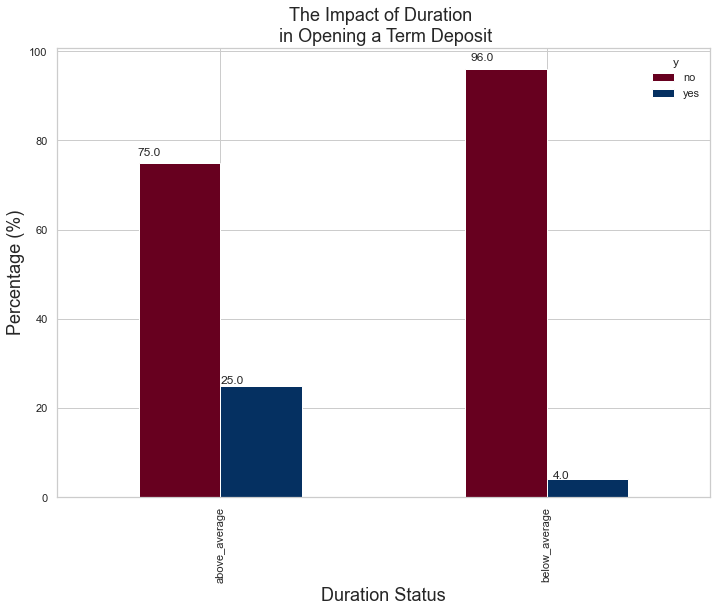

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df['duration_status'], df['y']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

- Campaign Duration: Hmm, we see that duration has a high correlation with term deposits meaning the higher the duration, the more likely it is for a client to open a term deposit.
- Average Campaign Duration: The average campaign duration is 258.28, let's see if clients that were above this average were more likely to open a term deposit.
- Duration Status: People who were above the duration status, were more likely to open a term deposit. 25% of the group that is above average in duration opened term deposits while those that were below average 4% opened term deposit accounts. This tells us that it will be a good idea to target individuals who are in the above average category.

/Users/zaintama/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/zaintama/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



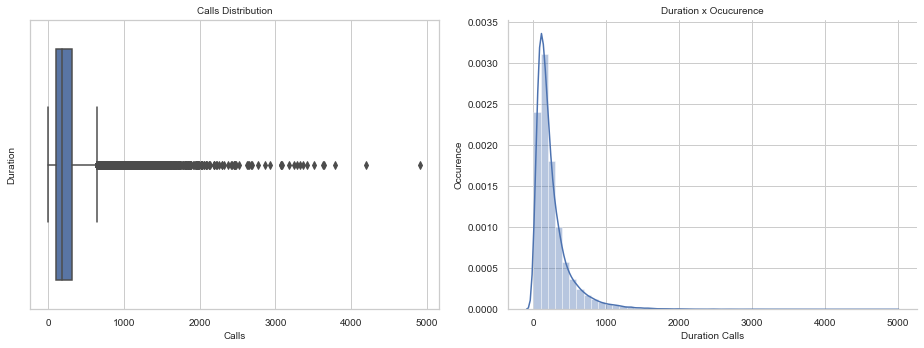

In [50]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = df_related, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(df_related['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [51]:
print("Max duration  call in minutes:  ", round((df_related['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((df_related['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((df_related['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((df_related['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean 

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


In [52]:
# Quartiles
print('1º Quartile: ', df_related['duration'].quantile(q = 0.25))
print('2º Quartile: ', df_related['duration'].quantile(q = 0.50))
print('3º Quartile: ', df_related['duration'].quantile(q = 0.75))
print('4º Quartile: ', df_related['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', df_related['duration'].quantile(q = 0.75) + 
                      1.5*(df_related['duration'].quantile(q = 0.75) - df_related['duration'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  102.0
2º Quartile:  179.0
3º Quartile:  319.0
4º Quartile:  4918.0
Duration calls above:  644.5 are outliers


In [53]:
print('Numerber of outliers: ', df_related[df_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(df_related))
#Outliers in %
print('Outliers are:', round(df_related[df_related['duration'] > 644.5]['duration'].count()*100/len(df_related),2), '%')

Numerber of outliers:  2820
Number of clients:  39258
Outliers are: 7.18 %


In [54]:
df[(df['duration'] == 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,duration_status
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,below_average
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,below_average
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no,below_average
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no,below_average


##  Contact, Month, Day of Week

/Users/zaintama/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/zaintama/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/zaintama/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



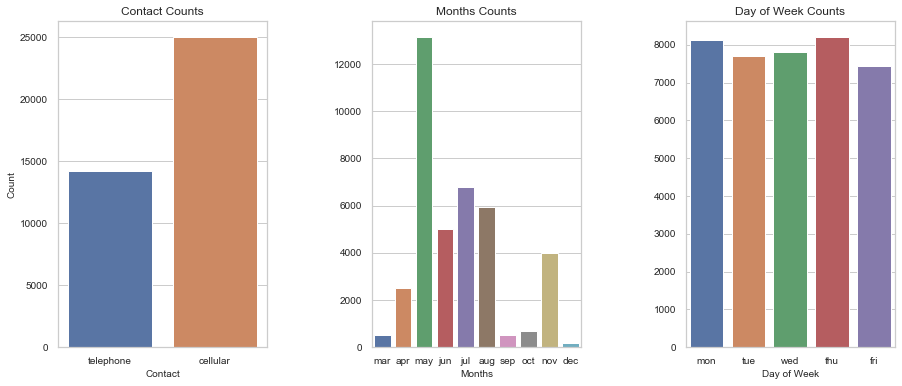

In [55]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(df_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(df_related['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(df_related['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)

In [56]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df_related['contact']     = labelencoder_X.fit_transform(df_related['contact']) 
df_related['month']       = labelencoder_X.fit_transform(df_related['month']) 
df_related['day_of_week'] = labelencoder_X.fit_transform(df_related['day_of_week']) 

In [57]:
df_related.head()

,contact,month,day_of_week,duration,campaign
0,1,6,1,261,1
1,1,6,1,149,1
2,1,6,1,226,1
3,1,6,1,151,1
4,1,6,1,307,1


In [58]:
def duration(data):

    data.loc[data['duration'] <= 103, 'duration'] = 1
    data.loc[(data['duration'] > 103) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 318)  , 'duration']   = 3
    data.loc[(data['duration'] > 318) & (data['duration'] <= 4918), 'duration'] = 4
    data.loc[data['duration']  > 4918, 'duration'] = 5

    return data
duration(df_related)

,contact,month,day_of_week,duration,campaign
0,1,6,1,3,1
1,1,6,1,2,1
2,1,6,1,3,1
3,1,6,1,2,1
4,1,6,1,3,1
...,...,...,...,...,...
41183,0,7,0,4,1
41184,0,7,0,4,1
41185,0,7,0,3,2
41186,0,7,0,4,1


## Other Attributes

In [59]:
df_o = df.loc[: , ['campaign', 'pdays','previous', 'poutcome','y']]
df_o.head()

,campaign,pdays,previous,poutcome,y
0,1,999,0,nonexistent,no
1,1,999,0,nonexistent,no
2,1,999,0,nonexistent,no
3,1,999,0,nonexistent,no
4,1,999,0,nonexistent,no


In [60]:
#df_o = pd.get_dummies(df_o[['poutcome','y']])
#df_o.head()

In [61]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df_o['poutcome']     = labelencoder_X.fit_transform(df_o['poutcome']) 
df_o['y']       = labelencoder_X.fit_transform(df_o['y']) 

In [62]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,duration_status
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,above_average
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,below_average
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,below_average
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,below_average
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,above_average


In [63]:
df_related

,contact,month,day_of_week,duration,campaign
0,1,6,1,3,1
1,1,6,1,2,1
2,1,6,1,3,1
3,1,6,1,2,1
4,1,6,1,3,1
...,...,...,...,...,...
41183,0,7,0,4,1
41184,0,7,0,4,1
41185,0,7,0,3,2
41186,0,7,0,4,1


In [64]:
df_o.head()

,campaign,pdays,previous,poutcome,y
0,1,999,0,1,0
1,1,999,0,1,0
2,1,999,0,1,0
3,1,999,0,1,0
4,1,999,0,1,0


In [65]:
bank_final= pd.concat([df_client, df_related, df_o], axis = 1)
bank_final.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,campaign,pdays,previous,poutcome,y
0,4,3,1,0,0,0,0,1,6,1,3,1,1,999,0,1,0
1,4,7,1,3,1,0,0,1,6,1,2,1,1,999,0,1,0
2,2,7,1,3,0,2,0,1,6,1,3,1,1,999,0,1,0
3,3,0,1,1,0,0,0,1,6,1,2,1,1,999,0,1,0
4,4,7,1,3,0,0,2,1,6,1,3,1,1,999,0,1,0


## EDA Analysis

- From the age distribution we conclude that:
    1. 1st Quartile:  32.0
    2. 2nd Quartile:  38.0
    3. 3rd Quartile:  47.0
    4. 4th Quartile:  98.0
    > Ages above:  69.5 are outliers
 - We can categorize the age by the quartile:
    - Category 1 : ages less than 32
    - Category 2 : ages between 32 through 38
    - Category 3 : ages between 38 through 47
    - Category 4 : ages between 47 through 98

- Months of Marketing Activity: We saw that the the month of highest level of marketing activity was the month of May. However, this was the month that potential clients tended to reject term deposits offers (Lowest effective rate: -34.49%). For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of March, September, October and December. (December should be under consideration because it was the month with the lowest marketing activity, there might be a reason why december is the lowest.)

- Campaign Duration: Hmm, we see that duration has a high correlation with term deposits meaning the higher the duration, the more likely it is for a client to open a term deposit.
- Average Campaign Duration: The average campaign duration is 374.76, let's see if clients that were above this average were more likely to open a term deposit.
- Duration Status: People who were above the duration status, were more likely to open a term deposit. 78% of the group that is above average in duration opened term deposits while those that were below average 32% opened term deposit accounts. This tells us that it will be a good idea to target individuals who are in the above average category.

# Modeling Training and Testing

In [66]:
X=bank_final.drop('y', axis=1)
y=bank_final['y']

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)

In [68]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,campaign,pdays,previous,poutcome
39218,2,0,2,3,0,0,0,0,5,3,4,1,1,6,2,2
5728,1,1,1,1,0,2,0,1,6,1,3,3,3,999,0,1
5187,4,10,0,6,1,2,0,1,6,0,1,1,1,999,0,1
24667,4,4,1,6,1,2,0,0,7,1,4,2,2,999,0,1
28657,4,1,0,0,0,2,0,0,0,2,3,1,1,999,1,0


In [69]:
X_train.dtypes

age            int64
job            int64
marital        int64
education      int64
default        int64
housing        int64
loan           int64
contact        int64
month          int64
day_of_week    int64
duration       int64
campaign       int64
campaign       int64
pdays          int64
previous       int64
poutcome       int64
dtype: object

In [70]:
print(y_train.shape)
print(y_test.shape)

(27480,)
(11778,)


In [71]:
X_train.shape

(27480, 16)

In [72]:
y_train.shape

(27480,)

In [73]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [74]:
# Time for Classification Models
import time


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
    from sklearn.naive_bayes import GaussianNB


dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(max_depth=10),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [75]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.process_time()
        classifier.fit(X_train, Y_train)
        t_end = time.process_time()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [76]:
df_results = batch_classify(X_train, y_train)
print(df_results.sort_values(by='train_score', ascending=False))

trained Logistic Regression in 0.14 s
trained Nearest Neighbors in 0.77 s
trained Linear SVM in 9.33 s
trained Gradient Boosting Classifier in 1.65 s
trained Decision Tree in 0.04 s
trained Random Forest in 2.01 s
trained Neural Net in 20.13 s
trained Naive Bayes in 0.02 s
                     classifier  train_score  training_time
4                 Decision Tree     0.918923       0.043169
1             Nearest Neighbors     0.914410       0.774415
5                 Random Forest     0.914301       2.011271
3  Gradient Boosting Classifier     0.908697       1.648012
2                    Linear SVM     0.904112       9.332094
6                    Neural Net     0.902074      20.126070
0           Logistic Regression     0.901783       0.139675
7                   Naive Bayes     0.865138       0.022325


In [77]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [78]:
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
4,Grad B CLF,0.906550
6,Neural Classifier,0.902074
7,Naives Bayes,0.902074
0,Logistic Reg.,0.901710
1,SVC,0.901456
5,Rand FC,0.892940
2,KNN,0.889847
3,Dec Tree,0.859243


In [79]:
#fungsi print_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 2832 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 4748 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 7088 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 12981 out of 12996 | elapsed:   53.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   53.3s finished


Best paramters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 90.72%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.915615     0.717577  0.907169      0.816596      0.893556
recall         0.986445     0.274747  0.907169      0.630596      0.907169
f1-score       0.949711     0.397354  0.907169      0.673533      0.888184
support    24419.000000  3061.000000  0.907169  27480.000000  27480.000000
_______________________________________________
Confusion Matrix: 
 [[24088   331]
 [ 2220   841]]

Test Result:
Accuracy Score: 90.00%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.912318     0.627451  0.899983      0.769885      0.880682
recall         0.981853     0.2446

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = { 
    "C":(list(range(1, 10))), 
    "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
    "max_iter":list(range(1, 10))
}


logreg_clf = LogisticRegression(random_state=42)
logreg_cv = GridSearchCV(logreg_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
logreg_cv.fit(X_train, y_train)
best_params = logreg_cv.best_params_
print(f"Best paramters: {best_params})")

logreg_clf = LogisticRegression(**best_params)
logreg_clf.fit(X_train, y_train)
print_score(logreg_clf, X_train, y_train, X_test, y_test, train=True)
print_score(logreg_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
/Users/zaintama/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done 1165 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:    6.3s finished


Best paramters: {'C': 1, 'max_iter': 3, 'solver': 'newton-cg'})
Train Result:
Accuracy Score: 90.20%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.905729     0.760623  0.902001      0.833176      0.889566
recall         0.993079     0.175433  0.902001      0.584256      0.902001
f1-score       0.947395     0.285108  0.902001      0.616251      0.873623
support    24419.000000  3061.000000  0.902001  27480.000000  27480.000000
_______________________________________________
Confusion Matrix: 
 [[24250   169]
 [ 2524   537]]

Test Result:
Accuracy Score: 90.04%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.905310     0.718447  0.900408      0.811878      0.884558
recall         0.991691     0.169725  0.900408      0.580708      0.900408
f1-score       0.9465

/Users/zaintama/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

/Users/zaintama/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.



In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':list(range(1,5)),
     'algorithm':['brute','kd_tree','ball_tree'],
     'leaf_size':list(range(30,40)) 
}

knn_cv = GridSearchCV(knn_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)

knn_cv.fit(X_train, y_train)
best_params = knn_cv.best_params_
print(f"Best paramters: {best_params})")

knn_clf = KNeighborsClassifier(**best_params)
knn_clf.fit(X_train, y_train)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 21.8min finished


Best paramters: {'algorithm': 'brute', 'leaf_size': 30, 'n_neighbors': 4})
Train Result:
Accuracy Score: 91.34%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.916066     0.842211  0.913392      0.879138      0.907839
recall         0.993571     0.273767  0.913392      0.633669      0.913392
f1-score       0.953245     0.413215  0.913392      0.683230      0.893091
support    24419.000000  3061.000000  0.913392  27480.000000  27480.000000
_______________________________________________
Confusion Matrix: 
 [[24262   157]
 [ 2223   838]]

Test Result:
Accuracy Score: 89.42%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.905843     0.574879   0.89421      0.740361      0.869088
recall         0.983190     0.181957   0.89421      0.582574      0.894210
f1-score  

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

params = {
    'loss':['deviance','exponential'],
    'learning_rate':[0.1,1,10,100],
    'n_estimators':[int(x) for x in np.linspace(start=200, stop=300, num=10)]
}

grad_cv = RandomizedSearchCV(grad_clf,params, scoring='accuracy', n_iter=10, cv=3, verbose=1, random_state=23, n_jobs=-1)

grad_cv.fit(X_train, y_train)
best_params = grad_cv.best_params_
print(f"Best paramters: {best_params})")

grad_clf = GradientBoostingClassifier(**best_params)
grad_clf.fit(X_train, y_train)
print_score(grad_clf, X_train, y_train, X_test, y_test, train=True)
print_score(grad_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   21.7s finished


Best paramters: {'n_estimators': 300, 'loss': 'deviance', 'learning_rate': 0.1})
Train Result:
Accuracy Score: 91.25%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.921695     0.738562  0.912518      0.830128      0.901296
recall         0.985257     0.332244  0.912518      0.658751      0.912518
f1-score       0.952417     0.458315  0.912518      0.705366      0.897379
support    24419.000000  3061.000000  0.912518  27480.000000  27480.000000
_______________________________________________
Confusion Matrix: 
 [[24059   360]
 [ 2044  1017]]

Test Result:
Accuracy Score: 90.76%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.919889     0.681518  0.907624      0.800704      0.893417
recall         0.981566     0.315749  0.907624      0.648658      0.907624
f1-s

In [84]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

params = {
    'C': [int(x) for x in np.linspace(start=200, stop=400, num=10)],
    'max_iter':[int(x) for x in np.linspace(start=200, stop=400, num=10)],
    'kernel':['rbf','linear','sigmoid']
    }
svc_clf = SVC(random_state=42)
svc_cv = GridSearchCV(svc_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
svc_cv.fit(X_train, y_train)
best_params = svc_cv.best_params_
print(f"Best parameters: {best_params})")

svc_clf = SVC(**best_params)
svc_clf.fit(X_train, y_train)
print_score(svc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svc_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  1.0min finished
/Users/zaintama/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning:

Solver terminated early (max_iter=311).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



Best parameters: {'C': 244, 'kernel': 'rbf', 'max_iter': 311})


/Users/zaintama/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning:

Solver terminated early (max_iter=311).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



Train Result:
Accuracy Score: 76.84%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.900951     0.167338  0.768377      0.534144      0.819233
recall         0.830665     0.271480  0.768377      0.551072      0.768377
f1-score       0.864381     0.207051  0.768377      0.535716      0.791161
support    24419.000000  3061.000000  0.768377  27480.000000  27480.000000
_______________________________________________
Confusion Matrix: 
 [[20284  4135]
 [ 2230   831]]

Test Result:
Accuracy Score: 76.80%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.900507     0.163756  0.767957      0.532132      0.818688
recall         0.830755     0.265291  0.767957      0.548023      0.767957
f1-score       0.864226     0.202509  0.767957      0.533368      0.790739
support   

In [85]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
params = {
    'var_smoothing':[0.1,0.01,0.001,0.0001],
}
nav_clf=GaussianNB()
nav_cv = GridSearchCV(nav_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
nav_cv.fit(X_train, y_train)
best_params = nav_cv.best_params_
print(f"Best parameters: {best_params})")

nav_clf = GaussianNB(**best_params)
nav_clf.fit(X_train, y_train)
print_score(nav_clf, X_train, y_train, X_test, y_test, train=True)
print_score(nav_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.2s finished


Best parameters: {'var_smoothing': 0.1})
Train Result:
Accuracy Score: 87.24%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.914987     0.402364   0.87238      0.658675      0.857885
recall         0.944101     0.300229   0.87238      0.622165      0.872380
f1-score       0.929316     0.343873   0.87238      0.636594      0.864103
support    24419.000000  3061.000000   0.87238  27480.000000  27480.000000
_______________________________________________
Confusion Matrix: 
 [[23054  1365]
 [ 2142   919]]

Test Result:
Accuracy Score: 87.05%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.913699     0.387797  0.870521      0.650748      0.855295
recall         0.943457     0.286697  0.870521      0.615077      0.870521
f1-score       0.928340     0.329670  0.8705

In [86]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
params = {
    'alpha':[0.1,0.01,0.001],
    'random_state':[23]
}
neural_cv = GridSearchCV(neural_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
neural_cv.fit(X_train, y_train)
best_params = neural_cv.best_params_
print(f"Best parameters: {best_params})")

neural_clf = MLPClassifier(**best_params)
neural_clf.fit(X_train, y_train)
print_score(neural_clf, X_train, y_train, X_test, y_test, train=True)
print_score(neural_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   17.5s remaining:   21.9s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   23.7s finished


Best parameters: {'alpha': 0.1, 'random_state': 23})
Train Result:
Accuracy Score: 90.65%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.914454     0.719643  0.906514      0.817048      0.892754
recall         0.987141     0.263313  0.906514      0.625227      0.906514
f1-score       0.949408     0.385554  0.906514      0.667481      0.886600
support    24419.000000  3061.000000  0.906514  27480.000000  27480.000000
_______________________________________________
Confusion Matrix: 
 [[24105   314]
 [ 2255   806]]

Test Result:
Accuracy Score: 90.05%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.910834     0.647186  0.900492      0.779010      0.881555
recall         0.984432     0.228593  0.900492      0.606512      0.900492
f1-score       0.946204     0.33

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

params = {
    'max_depth':[10,20],
    'min_samples_leaf':[10,20],
    'n_estimators':[int(x) for x in np.linspace(start=200, stop=300, num=10)],
    'random_state':[23]
}

rand_cv = RandomizedSearchCV(rand_clf,params, scoring='accuracy', n_iter=10, cv=3, verbose=1, random_state=23, n_jobs=-1)

rand_cv.fit(X_train, y_train)
best_params = rand_cv.best_params_
print(f"Best paramters: {best_params})")

rand_clf = RandomForestClassifier(**best_params)
rand_clf.fit(X_train, y_train)
print_score(rand_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rand_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.6s finished


Best paramters: {'random_state': 23, 'n_estimators': 233, 'min_samples_leaf': 10, 'max_depth': 20})
Train Result:
Accuracy Score: 90.95%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.913063     0.807940  0.909498      0.860502      0.901353
recall         0.992670     0.245998  0.909498      0.619334      0.909498
f1-score       0.951204     0.377160  0.909498      0.664182      0.887261
support    24419.000000  3061.000000  0.909498  27480.000000  27480.000000
_______________________________________________
Confusion Matrix: 
 [[24240   179]
 [ 2308   753]]

Test Result:
Accuracy Score: 90.20%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.909099     0.696429  0.902021      0.802764      0.885481
recall         0.988634     0.208716  0.902021      0.598675

## Model Analysis

We used several model to predict such as logistic regression, KNN,Random Forest, SVC, Naive Bayes, Decision Tree, and Neural Network

|   Model name	        |     Training score	|   Training time	| Crossval Mean Score|
|:-:	                |---	                |---	            |---                 |
|   Decision tree	    |   0.918923	        |   0.043169	    |0.859243|
|   KNN	                |   0.914410            |   0.774415	    |0.889847|
|   Random forest	    |   0.914301            |   2.011271 	    |0.892940|
|   Gradient boost	    |   0.908697      	    |    1.648012 	    |0.906550|
|   Neural Net	        |    0.902074      	    |   20.126070	    |0.902074|
|   Linear SVM	        |  0.904112       	    |   9.332094	    |0.901456|
|   Logistic regression	|  0.901783       	    |     0.139675      |0.901710|
|   Naive Bayes	        |   0.865138	        |   0.022325        |0.902074|

The fastest model training time is Naive Bayes and the longest time took to train is Neural Net. These models are not tuned with best parameters, but the cross validation score was great with the lowest score is 85.92 % (Decision tree) and the highest score is 90.65% (Gradient Boost)

|   Model name	        |    Grid/Random       |     Training score	|   Test score	    | Best parameter|
|:-:	                |---                   |---	                |---	            |---            |
|   Decision tree	    |Grid                 |   90.72%	        |   90%	            |'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2, 'splitter': 'random'|
|   KNN	                |Grid                       |   91.34%           |   89.42%	    |'algorithm': 'brute', 'leaf_size': 30, 'n_neighbors': 4|
|   Random forest	    |Random                       |   90.95%            |   90.20% 	    |'random_state': 23, 'n_estimators': 233, 'min_samples_leaf': 10, 'max_depth': 20|
|   Gradient boost	    |Random           |    91.25%     	    |    90.76% 	    |'n_estimators': 300, 'loss': 'deviance', 'learning_rate': 0.1|
|   Neural Net	        |Grid           |    90.65%     	    |   90.05%	    |'alpha': 0.1, 'random_state': 23|
|   Linear SVM	        |Grid           |  76.84%       	    |   76.80%	    |'C': 244, 'kernel': 'rbf', 'max_iter': 311|
|   Logistic regression	|Grid           |  90.20%        	    |     90.04%      |'C': 1, 'max_iter': 3, 'solver': 'newton-cg'                                                                       |
|   Naive Bayes	        |Grid           |   87.24%	        |   87.05%        |var_smoothing': 0.1|

After exceuting Grid Search or Random Search, we could find the best hyper parameter for each model. Several models are in good accuracy either in training and testing score, 87-90% accuracy. Although, the Linear SVM model is the lowest score with 76.84% in training score and 76.80% in test score. This need to be tune again.

Overall, the best model that can be used after searching the best parameter is Gradient boost, altough it's using randomized search because its took a long time if we used grid search. But, by only using randomized search on gradient boost, the accuracy is great.

# Evaluating Model

## Making new data

In [87]:
df.shape

(39258, 22)

In [88]:
bank_final.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,campaign,pdays,previous,poutcome,y
0,4,3,1,0,0,0,0,1,6,1,3,1,1,999,0,1,0
1,4,7,1,3,1,0,0,1,6,1,2,1,1,999,0,1,0
2,2,7,1,3,0,2,0,1,6,1,3,1,1,999,0,1,0
3,3,0,1,1,0,0,0,1,6,1,2,1,1,999,0,1,0
4,4,7,1,3,0,0,2,1,6,1,3,1,1,999,0,1,0


In [89]:
bank_final.shape

(39258, 17)

In [134]:
print(bank_final['pdays'].unique())
print(bank_final['duration'].unique())

[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27]
[3 2 4 1]


In [118]:
new_column = [bank_final.columns]
data = np.random.randint(1,4,size=(5,17))
df_new_data = pd.DataFrame(data, columns=new_column)
df_new_data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,campaign,pdays,previous,poutcome,y
0,1,3,3,2,1,1,2,1,3,3,2,1,1,3,2,3,2
1,1,1,1,3,2,2,1,2,1,1,1,2,2,2,3,3,2
2,1,1,3,3,2,3,3,3,3,2,2,3,3,2,1,1,1
3,3,1,1,3,2,3,1,2,3,1,2,3,1,3,2,2,2
4,3,1,3,1,2,3,1,1,1,3,3,2,1,3,3,1,1


In [107]:
import numpy as np
import pandas as pd

data = np.random.randint(5,30,size=(10,3))
df_new = pd.DataFrame(data, columns=['random_numbers_1', 'random_numbers_2', 'random_numbers_3'])

print(df)

   random_numbers_1  random_numbers_2  random_numbers_3
0                15                17                15
1                28                20                11
2                29                16                 6
3                25                24                13
4                14                12                14
5                22                19                10
6                 8                24                17
7                27                 9                16
8                21                29                11
9                27                17                 8


In [135]:
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
new_data = [[3,4,1,0,1,2,2,1,3,3,3,1,1,999,0,1], 
            [1,2,1,0,1,0,2,1,3,2,3,1,1,3,0,1], 
            [1,2,0,0,1,1,1,1,3,1,3,1,1,4,0,1],
            [3,3,1,0,1,2,2,1,3,4,3,1,1,26,0,1]]
new_data = ssc.fit_transform(new_data)

In [136]:
new_data_output_tree = tree_clf.predict(new_data)
new_data_output_logreg = logreg_clf.predict(new_data)
new_data_output_knn = knn_clf.predict(new_data)
new_data_output_grad = grad_clf.predict(new_data)
new_data_output_svc = svc_clf.predict(new_data)

In [137]:
print('Prediction using decision tree: ',new_data_output_tree)
print('Prediction using logistic regression: ', new_data_output_logreg)
print('Prediction using KNN: ', new_data_output_knn)
print('Prediction using gradient boost classifier: ',new_data_output_grad)
print('Prediction using SVC: ',new_data_output_svc)

Prediction using decision tree:  [0 0 0 0]
Prediction using logistic regression:  [0 0 0 0]
Prediction using KNN:  [0 0 0 0]
Prediction using gradient boost classifier:  [0 0 0 0]
Prediction using SVC:  [0 1 0 0]
